In [ ]:
import numpy as np
import pandas as pd
from sklearn  import preprocessing

**1. DATA PREPROCESSING**

In [ ]:
cst = pd.read_csv('customer_support_tickets_cleaned.csv')
cst

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,33,Christina Gray,greenkeith@example.net,36,Female,Fitbit Charge,2021-12-07,Billing inquiry,Product recommendation,I've noticed a software bug in the {product_pu...,Pending Customer Response,NaN,Medium,Chat,2023-06-01 19:36:21,NaN,NaN
1,53,Christian Graves,hgriffin@example.org,54,Male,Nest Thermostat,2021-10-10,Refund request,Network problem,I'm having an issue with the {product_purchase...,Closed,More left involve agree station billion would.,High,Social media,2023-06-01 01:54:49,2023-06-01 20:59:49,3.0
2,57,Alison Ford,mcgeebrandon@example.org,69,Male,Autodesk AutoCAD,2021-12-22,Technical issue,Software bug,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Medium,Social media,2023-06-01 10:33:53,NaN,NaN
3,81,Sarah Lee,dclark@example.net,50,Other,Microsoft Office,2021-03-22,Technical issue,Product recommendation,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Phone,2023-06-01 07:27:28,NaN,NaN
4,87,Danielle Everett,kimberlyhudson@example.com,46,Male,Sony PlayStation,2020-01-18,Technical issue,Product recommendation,I'm having an issue with the {product_purchase...,Closed,Represent where produce suddenly.,Critical,Phone,2023-06-01 18:03:35,2023-06-01 06:23:35,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,8387,Caitlin Robinson,bsmith@example.com,24,Female,Dyson Vacuum Cleaner,2020-02-11,Refund request,Installation support,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:50:37,NaN,NaN
505,8437,Rhonda Green,haleymitchell@example.net,59,Female,Lenovo ThinkPad,2020-09-01,Technical issue,Payment issue,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 05:58:44,NaN,NaN
506,8441,Margaret Ward,martinaudrey@example.com,43,Female,Autodesk AutoCAD,2020-04-23,Refund request,Product compatibility,I'm having an issue with the {product_purchase...,Closed,Space have anything party news.,Low,Chat,2023-06-01 20:17:48,2023-06-01 13:18:48,1.0
507,8447,Steven Brown,umoore@example.org,19,Other,LG OLED,2020-03-14,Billing inquiry,Installation support,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 09:42:57,NaN,NaN


In [ ]:
cst.describe()

,Ticket ID,Customer Age,Customer Satisfaction Rating
count,509.000000,509.000000,167.000000
mean,4298.563851,43.958743,2.952096
std,2441.414015,15.347942,1.426126
min,33.000000,18.000000,1.000000
25%,2158.000000,31.000000,2.000000
50%,4328.000000,43.000000,3.000000
75%,6442.000000,58.000000,4.000000
max,8459.000000,70.000000,5.000000


In [ ]:
cst.isnull().sum()

,0
Ticket ID,0
Customer Name,0
Customer Email,0
Customer Age,0
Customer Gender,0
Product Purchased,0
Date of Purchase,0
Ticket Type,0
Ticket Subject,0
Ticket Description,0


In [ ]:
cst.dropna(subset=['Resolution','First Response Time','Time to Resolution','Customer Satisfaction Rating'])

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
1,53,Christian Graves,hgriffin@example.org,54,Male,Nest Thermostat,2021-10-10,Refund request,Network problem,I'm having an issue with the {product_purchase...,Closed,More left involve agree station billion would.,High,Social media,2023-06-01 01:54:49,2023-06-01 20:59:49,3.0
4,87,Danielle Everett,kimberlyhudson@example.com,46,Male,Sony PlayStation,2020-01-18,Technical issue,Product recommendation,I'm having an issue with the {product_purchase...,Closed,Represent where produce suddenly.,Critical,Phone,2023-06-01 18:03:35,2023-06-01 06:23:35,2.0
6,107,Miranda Morales,daniellebrown@example.net,42,Female,Nintendo Switch,2021-05-20,Cancellation request,Installation support,I'm having an issue with the {product_purchase...,Closed,Table admit really Mrs development move.,Low,Email,2023-06-01 11:38:01,2023-06-01 20:46:01,2.0
8,115,William Byrd,dflores@example.org,28,Female,Sony 4K HDR TV,2020-09-20,Cancellation request,Battery life,My {product_purchased} is making strange noise...,Closed,List oil tax effort themselves will.,High,Email,2023-06-01 10:27:10,2023-06-01 06:04:10,1.0
9,150,Kenneth Cruz,thompsonamanda@example.org,64,Female,Philips Hue Lights,2021-03-18,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Closed,Health most those thought return.,Critical,Email,2023-06-01 16:34:07,2023-06-01 20:02:07,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,8293,Caitlin Boyd,santosnancy@example.org,29,Male,Google Nest,2020-12-02,Refund request,Network problem,I'm having an issue with the {product_purchase...,Closed,Financial he popular field commercial.,Medium,Email,2023-06-01 12:26:28,2023-06-01 04:05:28,1.0
499,8295,Latoya Silva,nhall@example.net,38,Female,Sony 4K HDR TV,2021-01-07,Product inquiry,Network problem,I'm having an issue with the {product_purchase...,Closed,Game as former animal audience.,Medium,Chat,2023-06-01 10:05:31,2023-06-01 12:02:31,5.0
502,8351,Adrian Harmon,vrivera@example.com,63,Other,MacBook Pro,2020-08-19,Product inquiry,Product setup,I'm having an issue with the {product_purchase...,Closed,Drug especially decade how impact break item.,Critical,Phone,2023-06-01 13:33:46,2023-06-01 18:01:46,5.0
503,8371,Rebecca Harper,keithmora@example.net,46,Other,Bose SoundLink Speaker,2021-07-13,Billing inquiry,Network problem,I'm having an issue with the {product_purchase...,Closed,Over if government across message face go.,Critical,Phone,2023-06-01 11:12:18,2023-06-01 01:33:18,1.0


In [ ]:
cst.isnull().sum()

,0
Ticket ID,0
Customer Name,0
Customer Email,0
Customer Age,0
Customer Gender,0
Product Purchased,0
Date of Purchase,0
Ticket Type,0
Ticket Subject,0
Ticket Description,0


In [ ]:
label_encoder = preprocessing.LabelEncoder()
cst['Customer Gender']= label_encoder.fit_transform(cst['Customer Gender'])

cst['Customer Gender'].unique()

array([0, 1, 2])

In [ ]:
cst['Product Purchased']= label_encoder.fit_transform(cst['Product Purchased'])

cst['Product Purchased'].unique()

array([12, 28,  5, 25, 38, 11, 30,  7, 37, 32, 16, 17, 35, 20, 19, 27, 14,
        2, 40,  1, 24, 10, 31,  8, 33, 26,  4, 36, 41,  6,  0, 18, 13, 23,
       15,  3, 21, 34, 29, 39, 22,  9])

In [ ]:
cst['Ticket Type']= label_encoder.fit_transform(cst['Ticket Type'])

cst['Ticket Type'].unique()

array([0, 3, 4, 2, 1])

In [ ]:
cst['Ticket Subject']= label_encoder.fit_transform(cst['Ticket Subject'])

cst['Ticket Subject'].unique()

array([12,  8, 15,  1,  7,  0, 10, 14,  6, 13,  3,  9,  5,  4,  2, 11])

In [ ]:
cst['Ticket Description']= label_encoder.fit_transform(cst['Ticket Description'])

cst['Ticket Description'].unique()

array([292, 171, 133, 126,  35, 105, 130, 332, 319,  83, 289,  14,  11,
       117, 131, 217,  96,  25, 281, 328, 266, 151,  68,  34, 263, 166,
       121, 204, 244, 161,  64, 223, 112, 245,  31, 132, 305,  78, 138,
       175, 202,  94, 169, 119, 283,  80, 111, 114,   9, 129,  73,  15,
       301,  26, 158,  74,   0, 294,  97, 278,  49, 115, 135,  54,  40,
       239, 326, 322, 150,  57, 156, 300, 146, 102, 321, 317, 264, 212,
       116, 238, 252,  86, 227,  77, 109, 310,  99, 172, 236, 160, 137,
        12, 271, 188, 110,  23, 311, 255, 127,  18, 231, 232,  72, 288,
       318,   4,  20, 247, 327, 200, 167,  39, 148, 313, 272, 144, 286,
        59,  17, 194,   1,   6, 192, 308, 228,  50, 162, 179, 224, 134,
       139, 195,  33,  55, 226, 190, 173, 270, 122, 221, 316, 216, 315,
       220, 257, 208, 254, 153,  76, 168, 181, 293, 296,  21, 280, 331,
       100, 128,  58, 141, 108, 302, 124, 106, 256, 185, 154,  62,  41,
        36, 213, 330, 290,  79, 155, 268,  13, 253,  32,  84, 13

In [ ]:
cst['Ticket Status']= label_encoder.fit_transform(cst['Ticket Status'])

cst['Ticket Status'].unique()

array([2, 0, 1])

In [ ]:
cst['Ticket Priority']= label_encoder.fit_transform(cst['Ticket Priority'])

cst['Ticket Priority'].unique()

array([3, 1, 0, 2])

In [ ]:
cst['Ticket Channel']= label_encoder.fit_transform(cst['Ticket Channel'])

cst['Ticket Channel'].unique()

array([0, 3, 2, 1])

In [ ]:
cst

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,33,Christina Gray,greenkeith@example.net,36,0,12,2021-12-07,0,12,292,2,NaN,3,0,2023-06-01 19:36:21,NaN,NaN
1,53,Christian Graves,hgriffin@example.org,54,1,28,2021-10-10,3,8,171,0,More left involve agree station billion would.,1,3,2023-06-01 01:54:49,2023-06-01 20:59:49,3.0
2,57,Alison Ford,mcgeebrandon@example.org,69,1,5,2021-12-22,4,15,133,2,NaN,3,3,2023-06-01 10:33:53,NaN,NaN
3,81,Sarah Lee,dclark@example.net,50,2,25,2021-03-22,4,12,126,2,NaN,0,2,2023-06-01 07:27:28,NaN,NaN
4,87,Danielle Everett,kimberlyhudson@example.com,46,1,38,2020-01-18,4,12,35,0,Represent where produce suddenly.,0,2,2023-06-01 18:03:35,2023-06-01 06:23:35,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,8387,Caitlin Robinson,bsmith@example.com,24,0,11,2020-02-11,3,7,117,2,NaN,0,3,2023-06-01 12:50:37,NaN,NaN
505,8437,Rhonda Green,haleymitchell@example.net,59,0,23,2020-09-01,4,9,157,2,NaN,0,3,2023-06-01 05:58:44,NaN,NaN
506,8441,Margaret Ward,martinaudrey@example.com,43,0,5,2020-04-23,3,11,69,0,Space have anything party news.,2,0,2023-06-01 20:17:48,2023-06-01 13:18:48,1.0
507,8447,Steven Brown,umoore@example.org,19,2,20,2020-03-14,0,7,24,2,NaN,0,0,2023-06-01 09:42:57,NaN,NaN


In [ ]:
c = pd.read_csv('customer_support_tickets_cleaned.csv')
c

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,33,Christina Gray,greenkeith@example.net,36,Female,Fitbit Charge,2021-12-07,Billing inquiry,Product recommendation,I've noticed a software bug in the {product_pu...,Pending Customer Response,NaN,Medium,Chat,2023-06-01 19:36:21,NaN,NaN
1,53,Christian Graves,hgriffin@example.org,54,Male,Nest Thermostat,2021-10-10,Refund request,Network problem,I'm having an issue with the {product_purchase...,Closed,More left involve agree station billion would.,High,Social media,2023-06-01 01:54:49,2023-06-01 20:59:49,3.0
2,57,Alison Ford,mcgeebrandon@example.org,69,Male,Autodesk AutoCAD,2021-12-22,Technical issue,Software bug,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Medium,Social media,2023-06-01 10:33:53,NaN,NaN
3,81,Sarah Lee,dclark@example.net,50,Other,Microsoft Office,2021-03-22,Technical issue,Product recommendation,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Phone,2023-06-01 07:27:28,NaN,NaN
4,87,Danielle Everett,kimberlyhudson@example.com,46,Male,Sony PlayStation,2020-01-18,Technical issue,Product recommendation,I'm having an issue with the {product_purchase...,Closed,Represent where produce suddenly.,Critical,Phone,2023-06-01 18:03:35,2023-06-01 06:23:35,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,8387,Caitlin Robinson,bsmith@example.com,24,Female,Dyson Vacuum Cleaner,2020-02-11,Refund request,Installation support,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:50:37,NaN,NaN
505,8437,Rhonda Green,haleymitchell@example.net,59,Female,Lenovo ThinkPad,2020-09-01,Technical issue,Payment issue,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 05:58:44,NaN,NaN
506,8441,Margaret Ward,martinaudrey@example.com,43,Female,Autodesk AutoCAD,2020-04-23,Refund request,Product compatibility,I'm having an issue with the {product_purchase...,Closed,Space have anything party news.,Low,Chat,2023-06-01 20:17:48,2023-06-01 13:18:48,1.0
507,8447,Steven Brown,umoore@example.org,19,Other,LG OLED,2020-03-14,Billing inquiry,Installation support,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 09:42:57,NaN,NaN


In [ ]:
c.shape

(509, 17)

In [ ]:
cst.drop('Customer Email',axis=1)


,Ticket ID,Customer Name,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,33,Christina Gray,36,0,12,2021-12-07,0,12,292,2,NaN,3,0,2023-06-01 19:36:21,NaN,NaN
1,53,Christian Graves,54,1,28,2021-10-10,3,8,171,0,More left involve agree station billion would.,1,3,2023-06-01 01:54:49,2023-06-01 20:59:49,3.0
2,57,Alison Ford,69,1,5,2021-12-22,4,15,133,2,NaN,3,3,2023-06-01 10:33:53,NaN,NaN
3,81,Sarah Lee,50,2,25,2021-03-22,4,12,126,2,NaN,0,2,2023-06-01 07:27:28,NaN,NaN
4,87,Danielle Everett,46,1,38,2020-01-18,4,12,35,0,Represent where produce suddenly.,0,2,2023-06-01 18:03:35,2023-06-01 06:23:35,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,8387,Caitlin Robinson,24,0,11,2020-02-11,3,7,117,2,NaN,0,3,2023-06-01 12:50:37,NaN,NaN
505,8437,Rhonda Green,59,0,23,2020-09-01,4,9,157,2,NaN,0,3,2023-06-01 05:58:44,NaN,NaN
506,8441,Margaret Ward,43,0,5,2020-04-23,3,11,69,0,Space have anything party news.,2,0,2023-06-01 20:17:48,2023-06-01 13:18:48,1.0
507,8447,Steven Brown,19,2,20,2020-03-14,0,7,24,2,NaN,0,0,2023-06-01 09:42:57,NaN,NaN


In [ ]:
cst['Date of Purchase'] = pd.to_datetime(cst['Date of Purchase'], format='%Y-%m-%d')

In [ ]:
min_date = cst['Date of Purchase'].min()
# Calculate the difference in days from the minimum date and convert to float
cst['Days Since First Purchase'] = (cst['Date of Purchase'] - min_date).dt.days.astype(float)

In [ ]:
def time_string_to_seconds(time_str):
    if pd.isna(time_str): # Handle potential NaN values
        return np.nan
    try:
        h, m, s = map(int, time_str.split(':'))
        return h * 3600 + m * 60 + s
    except ValueError:
        # Handle cases where the format is unexpected or the value is not a valid time string
        return np.nan

cst['Time to Resolution_seconds'] = cst['Time to Resolution'].apply(time_string_to_seconds)

**2 EXPLORATORY DATA ANALYSIS**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


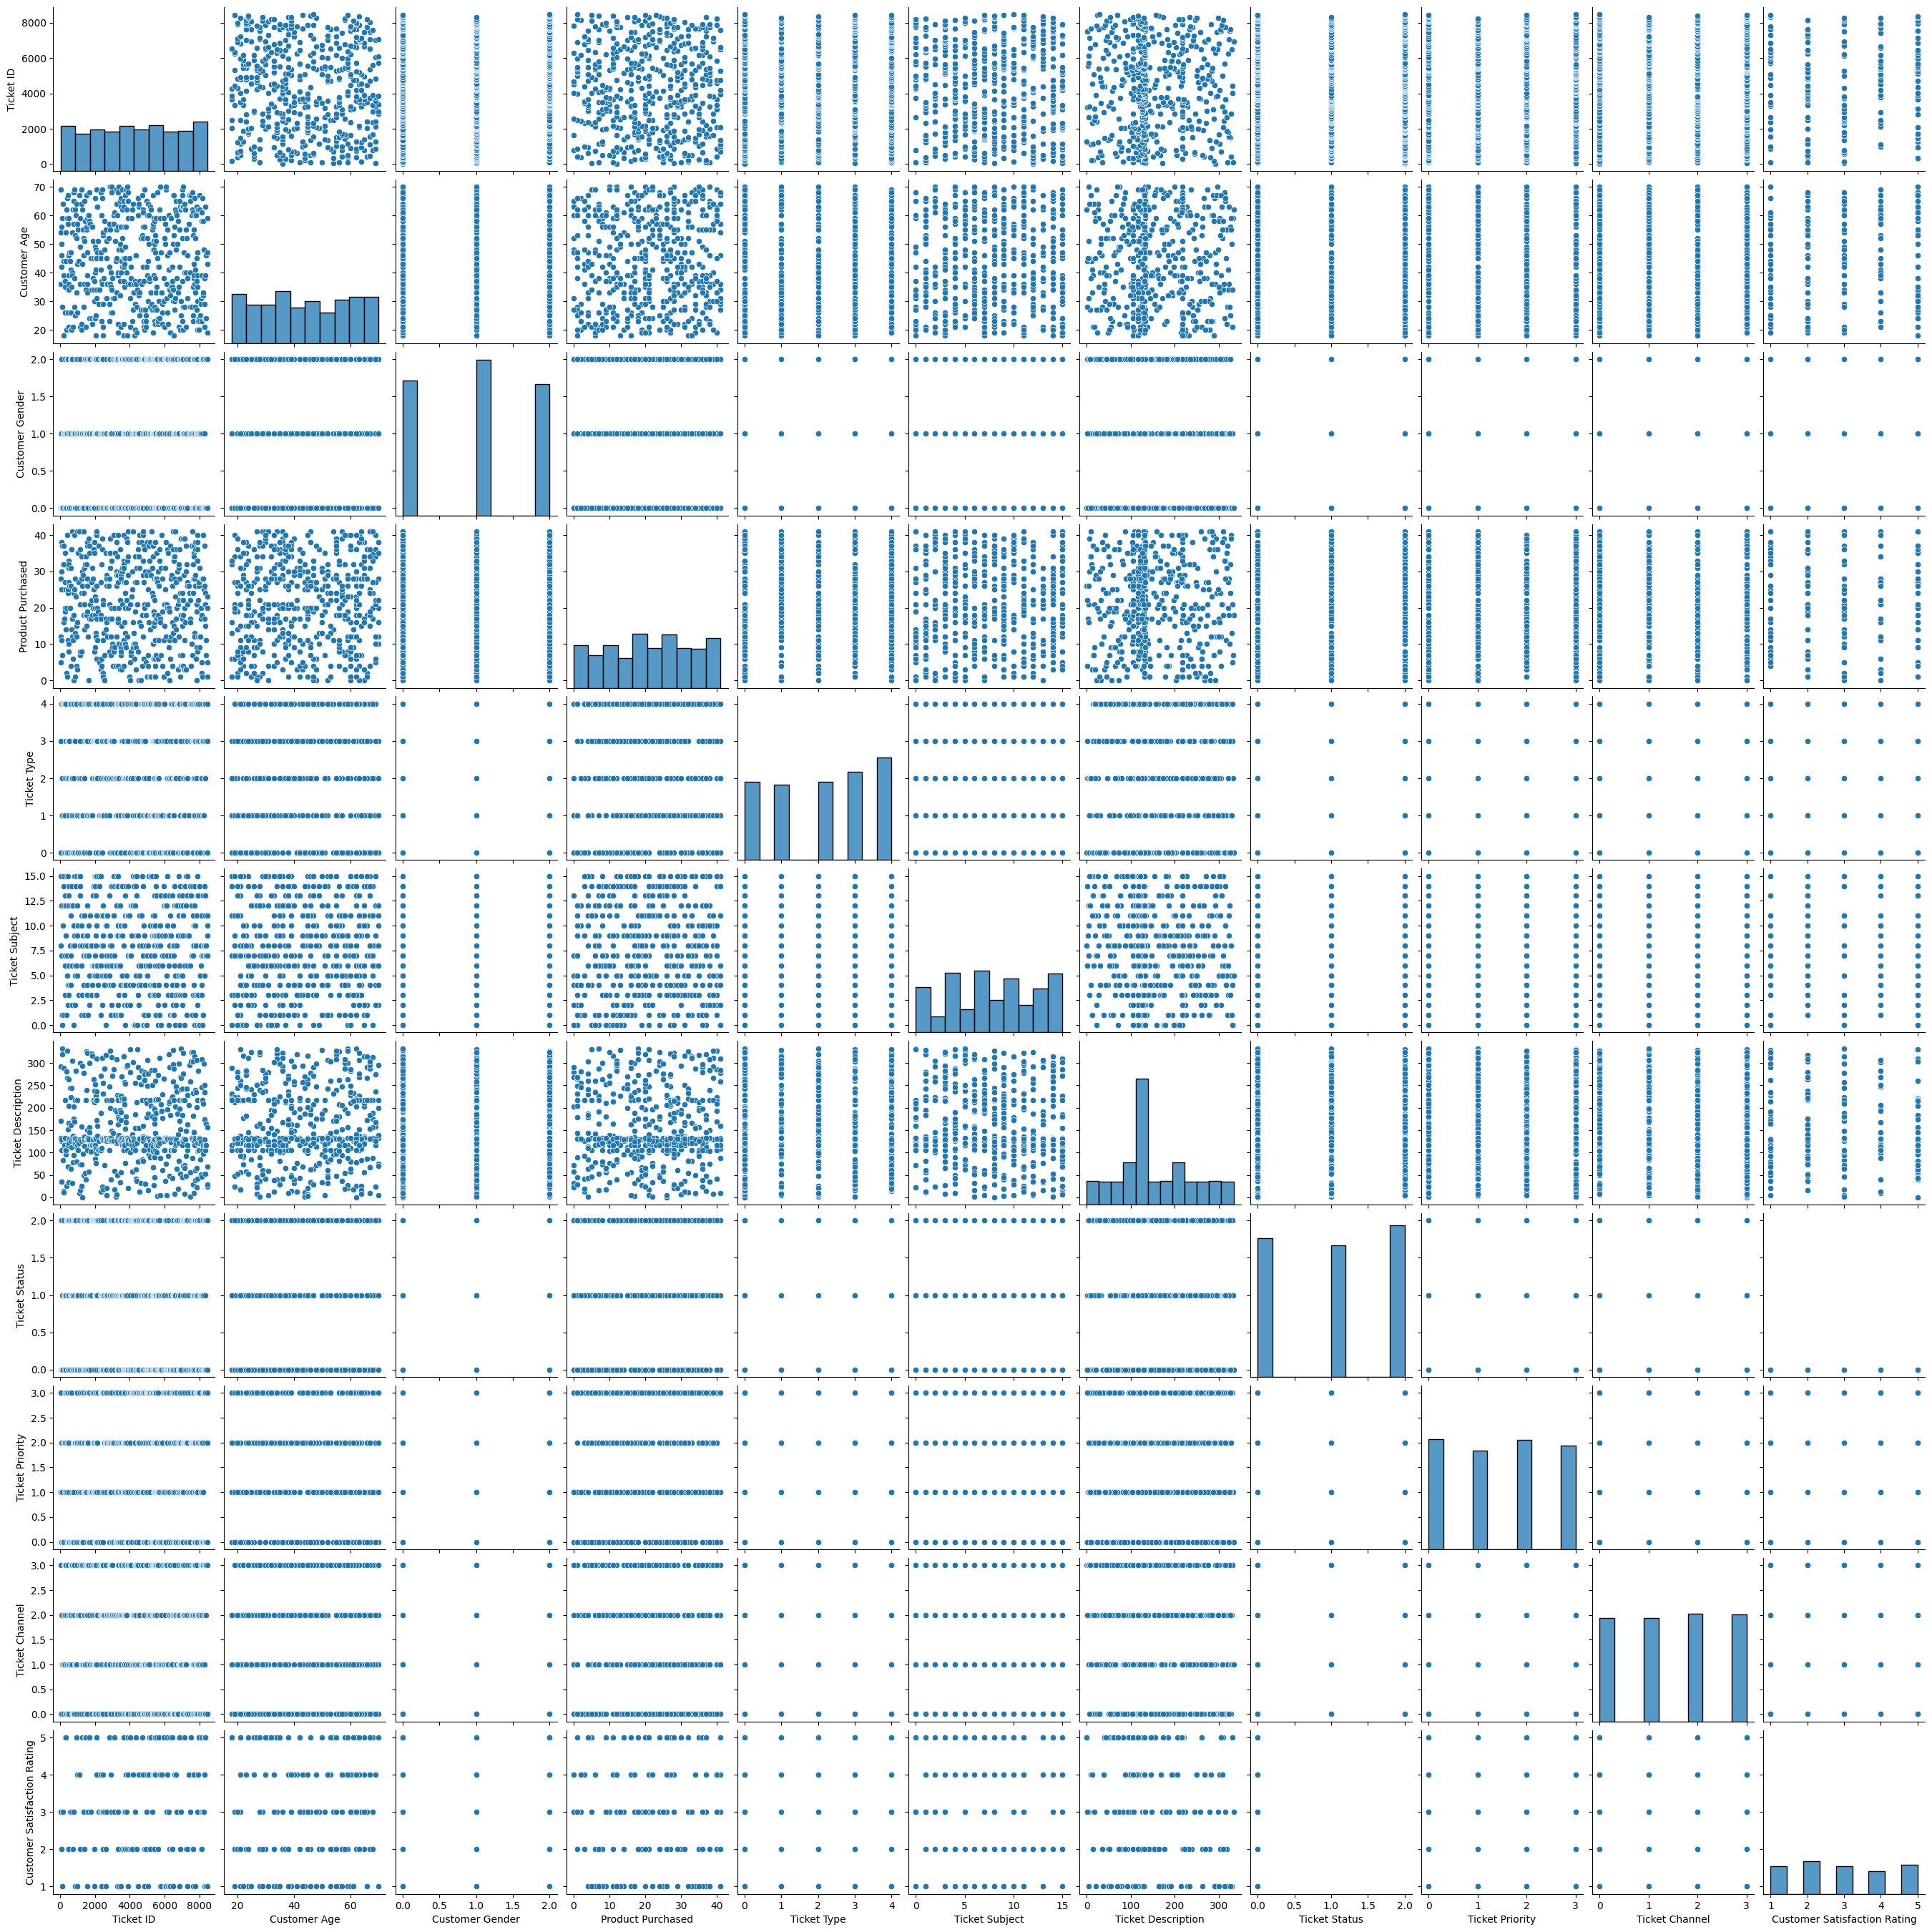

In [ ]:
sns.pairplot(data=cst)

<Axes: ylabel='Ticket Type'>

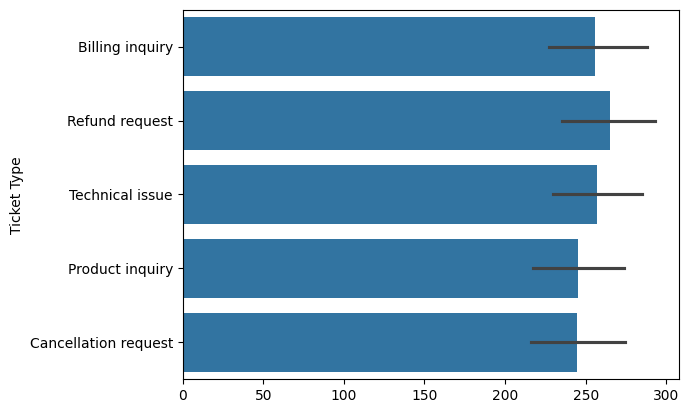

In [ ]:
sns.barplot(c['Ticket Type'])

<Axes: ylabel='Ticket Status'>

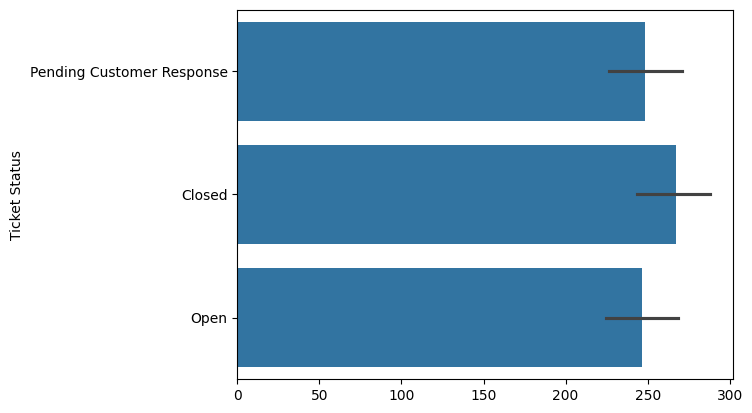

In [ ]:
sns.barplot(c['Ticket Status'])

the support system is pretty balanced

<Axes: xlabel='Customer Satisfaction Rating', ylabel='Count'>

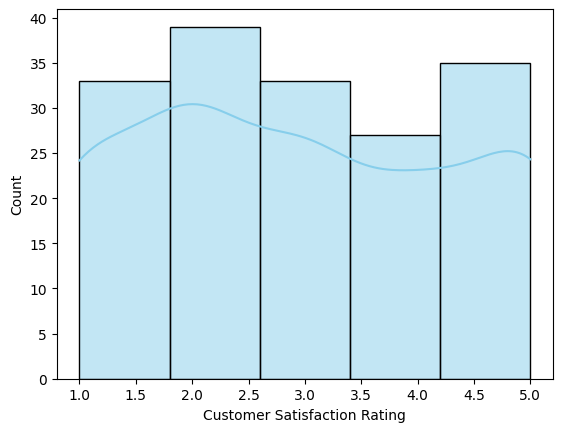

In [ ]:
sns.histplot(c['Customer Satisfaction Rating'], bins=5,
 kde=True, color='skyblue')

<Axes: xlabel='Customer Age', ylabel='Count'>

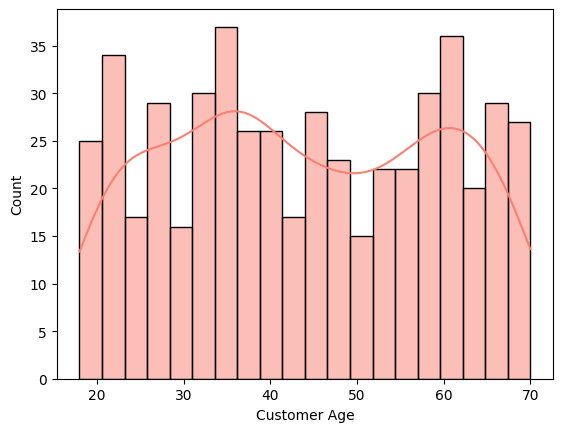

In [ ]:
 sns.histplot(c['Customer Age'], bins=20, kde=True,
 color='salmon')

<ipython-input-109-8f3f844d7505>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(c['Ticket Channel'], palette='rocket')


<Axes: ylabel='Ticket Channel'>

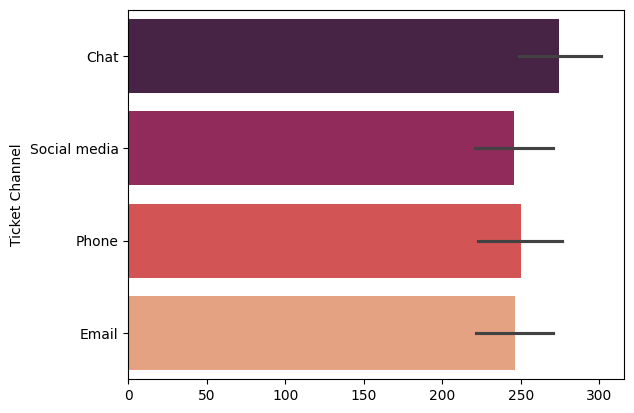

In [ ]:
 sns.barplot(c['Ticket Channel'], palette='rocket')

<ipython-input-110-ab4f1cf8a25c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer Gender',y='Customer Satisfaction Rating',data=average_satisfaction,palette='muted',


<Axes: xlabel='Customer Gender', ylabel='Customer Satisfaction Rating'>

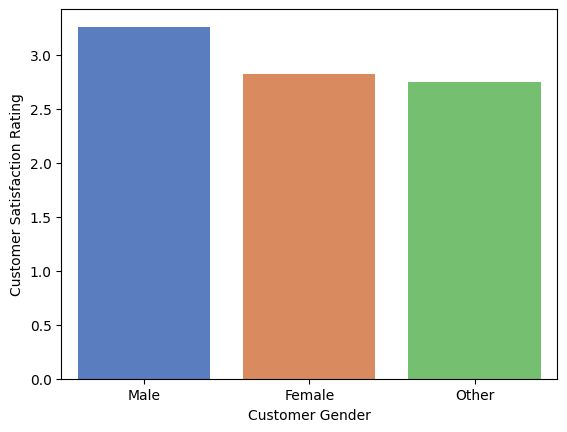

In [ ]:
average_satisfaction = c.groupby('Customer Gender')['Customer Satisfaction Rating'].mean().reset_index()

sns.barplot(x='Customer Gender',y='Customer Satisfaction Rating',data=average_satisfaction,palette='muted',
 order=['Male','Female','Other'])

<ipython-input-111-12cceb0d774b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=product_purchased_distribution.index, x=product_purchased_distribution, palette='magma')


<Axes: xlabel='count', ylabel='Product Purchased'>

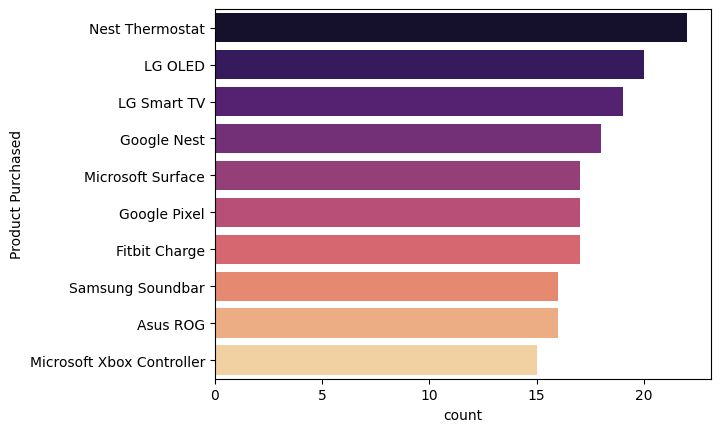

In [ ]:
product_purchased_distribution = c['Product Purchased'].value_counts().head(10)
sns.barplot(y=product_purchased_distribution.index, x=product_purchased_distribution, palette='magma')

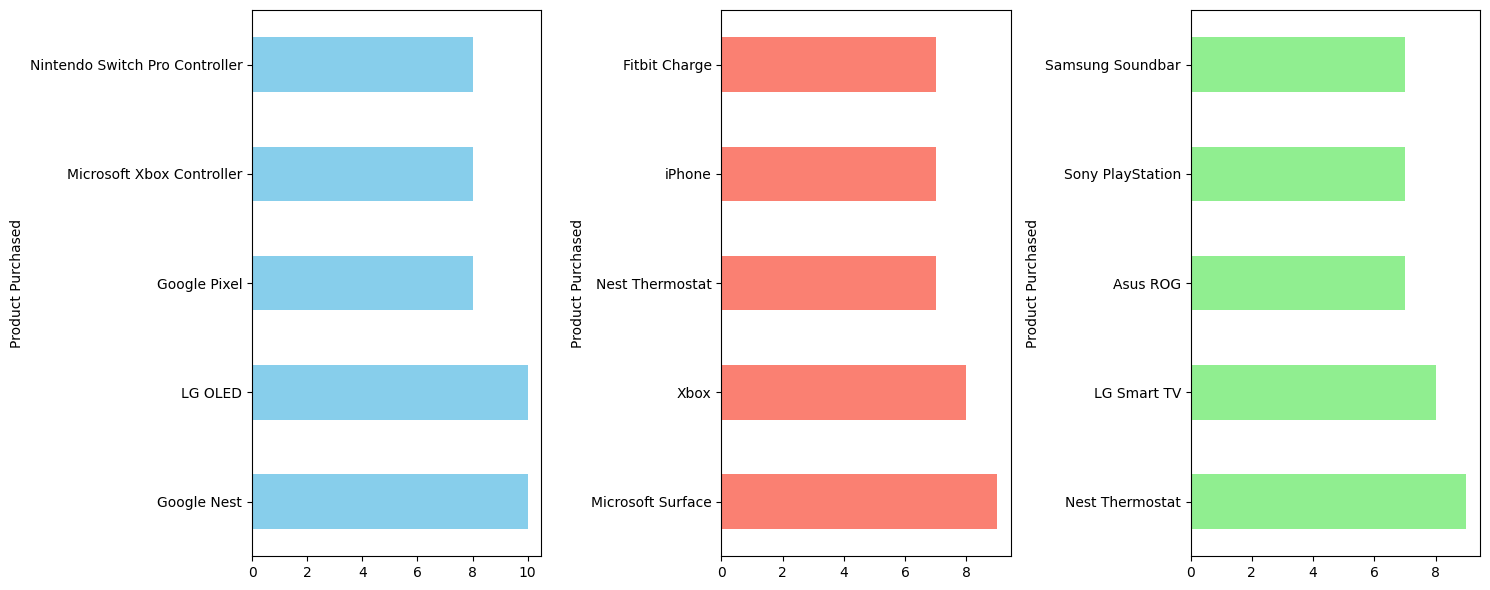

In [ ]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
top_items_male = c[c['Customer Gender'] == 'Male']['Product Purchased'].value_counts().head(5)
top_items_male.plot(kind='barh', color='skyblue')

plt.subplot(1, 3, 2)
top_items_female = c[c['Customer Gender'] == 'Female']['Product Purchased'].value_counts().head(5)
top_items_female.plot(kind='barh', color='salmon')

plt.subplot(1, 3, 3)
top_items_other = c[c['Customer Gender'] == 'Other']['Product Purchased'].value_counts().head(5)
top_items_other.plot(kind='barh', color='lightgreen')

plt.tight_layout()
plt.show()

<Axes: ylabel='count'>

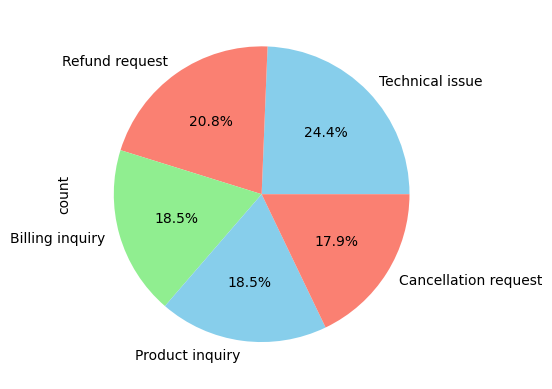

In [ ]:
ticket_type_distribution = c['Ticket Type'].value_counts()
ticket_type_distribution.plot(kind='pie', autopct='%1.1f%%',colors=['skyblue', 'salmon', 'lightgreen'])

In [ ]:
cst

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Days Since First Purchase,Time to Resolution_seconds
0,33,Christina Gray,greenkeith@example.net,36,0,12,2021-12-07,0,12,292,2,NaN,3,0,2023-06-01 19:36:21,NaN,NaN,706.0,NaN
1,53,Christian Graves,hgriffin@example.org,54,1,28,2021-10-10,3,8,171,0,More left involve agree station billion would.,1,3,2023-06-01 01:54:49,2023-06-01 20:59:49,3.0,648.0,NaN
2,57,Alison Ford,mcgeebrandon@example.org,69,1,5,2021-12-22,4,15,133,2,NaN,3,3,2023-06-01 10:33:53,NaN,NaN,721.0,NaN
3,81,Sarah Lee,dclark@example.net,50,2,25,2021-03-22,4,12,126,2,NaN,0,2,2023-06-01 07:27:28,NaN,NaN,446.0,NaN
4,87,Danielle Everett,kimberlyhudson@example.com,46,1,38,2020-01-18,4,12,35,0,Represent where produce suddenly.,0,2,2023-06-01 18:03:35,2023-06-01 06:23:35,2.0,17.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,8387,Caitlin Robinson,bsmith@example.com,24,0,11,2020-02-11,3,7,117,2,NaN,0,3,2023-06-01 12:50:37,NaN,NaN,41.0,NaN
505,8437,Rhonda Green,haleymitchell@example.net,59,0,23,2020-09-01,4,9,157,2,NaN,0,3,2023-06-01 05:58:44,NaN,NaN,244.0,NaN
506,8441,Margaret Ward,martinaudrey@example.com,43,0,5,2020-04-23,3,11,69,0,Space have anything party news.,2,0,2023-06-01 20:17:48,2023-06-01 13:18:48,1.0,113.0,NaN
507,8447,Steven Brown,umoore@example.org,19,2,20,2020-03-14,0,7,24,2,NaN,0,0,2023-06-01 09:42:57,NaN,NaN,73.0,NaN


In [ ]:
cst = cst.dropna(subset=['Resolution','First Response Time','Time to Resolution','Customer Satisfaction Rating'])

**3 Feature Engineering**

In [ ]:
from sklearn.model_selection import train_test_split, PredefinedSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [ ]:
y = cst['Customer Satisfaction Rating']
X = cst.drop(['Customer Satisfaction Rating','Customer Email','Customer Name','Date of Purchase','Resolution','Time to Resolution','First Response Time'],axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 0)


**4 Feature Scaling**

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


**5 Model Building**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
cv_params = {'n_estimators' : [50,100],
              'max_depth' : [10,50],
              'min_samples_leaf' : [0.5,1],
              'min_samples_split' : [0.001, 0.01],
              'max_features' : ["sqrt"],
              'max_samples' : [.5,.9]}

In [ ]:

rf = RandomForestClassifier(random_state=0)

In [ ]:
rf_val = GridSearchCV(rf, cv_params, refit='f1', n_jobs = -1, verbose = 1)

In [ ]:
%%time


rf_val.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
CPU times: user 536 ms, sys: 48.9 ms, total: 585 ms
Wall time: 21.7 s


GridSearchCV(estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [10, 50], 'max_features': ['sqrt'],
                         'max_samples': [0.5, 0.9],
                         'min_samples_leaf': [0.5, 1],
                         'min_samples_split': [0.001, 0.01],
                         'n_estimators': [50, 100]},
             refit='f1', verbose=1)

In [ ]:
rf_val.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'max_samples': 0.5,
 'min_samples_leaf': 0.5,
 'min_samples_split': 0.001,
 'n_estimators': 50}

In [ ]:
rf_opt = RandomForestClassifier(**rf_val.best_params_, random_state=0)

In [ ]:
rf_opt.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_samples=0.5, min_samples_leaf=0.5,
                       min_samples_split=0.001, n_estimators=50,
                       random_state=0)

In [ ]:
y_pred = rf_opt.predict(X_test)

** 6. Model Evaluation**

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

In [ ]:

pc_test = precision_score(y_test, y_pred, average='weighted')
print("The precision score is {pc:.3f}".format(pc = pc_test))

The precision score is 0.087


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
